# Question B1 (15 marks)

Real world datasets often have a mix of numeric and categorical features – this dataset is one example. To build models on such data, categorical features have to be encoded or embedded.

PyTorch Tabular is a library that makes it very convenient to build neural networks for tabular data. It is built on top of PyTorch Lightning, which abstracts away boilerplate model training code and makes it easy to integrate other tools, e.g. TensorBoard for experiment tracking.

For questions B1 and B2, the following features should be used:   
- **Numeric / Continuous** features: dist_to_nearest_stn, dist_to_dhoby, degree_centrality, eigenvector_centrality, remaining_lease_years, floor_area_sqm
- **Categorical** features: month, town, flat_model_type, storey_range



---



In [1]:
!pip install pytorch_tabular[extra]

In [2]:
SEED = 42

import os

import random
random.seed(SEED)

import numpy as np
np.random.seed(SEED)

import pandas as pd

from pytorch_tabular import TabularModel
from pytorch_tabular.models import CategoryEmbeddingModelConfig
from pytorch_tabular.config import (
    DataConfig,
    OptimizerConfig,
    TrainerConfig,
)

1.Divide the dataset (‘hdb_price_prediction.csv’) into train, validation and test sets by using entries from year 2019 and before as training data, year 2020 as validation data and year 2021 as test data.
**Do not** use data from year 2022 and year 2023.



In [3]:
df = pd.read_csv('hdb_price_prediction.csv')

# YOUR CODE HERE
train_data = df[df['year'] <= 2019]
val_data = df[df['year'] == 2020]
test_data = df[df['year'] == 2021]

2.Refer to the documentation of **PyTorch Tabular** and perform the following tasks: https://pytorch-tabular.readthedocs.io/en/latest/#usage
- Use **[DataConfig](https://pytorch-tabular.readthedocs.io/en/latest/data/)** to define the target variable, as well as the names of the continuous and categorical variables.
- Use **[TrainerConfig](https://pytorch-tabular.readthedocs.io/en/latest/training/)** to automatically tune the learning rate. Set batch_size to be 1024 and set max_epoch as 50.
- Use **[CategoryEmbeddingModelConfig](https://pytorch-tabular.readthedocs.io/en/latest/models/#category-embedding-model)** to create a feedforward neural network with 1 hidden layer containing 50 neurons.
- Use **[OptimizerConfig](https://pytorch-tabular.readthedocs.io/en/latest/optimizer/)** to choose Adam optimiser. There is no need to set the learning rate (since it will be tuned automatically) nor scheduler.
- Use **[TabularModel](https://pytorch-tabular.readthedocs.io/en/latest/tabular_model/)** to initialise the model and put all the configs together.

In [4]:
# YOUR CODE HERE
# YOUR CODE HERE
# define data
data_config = DataConfig(
    target=['resale_price'],
    continuous_cols=['dist_to_nearest_stn', 'dist_to_dhoby', 'degree_centrality', 'eigenvector_centrality', 'remaining_lease_years', 'floor_area_sqm'],
    categorical_cols=['month', 'town', 'flat_model_type', 'storey_range']
)

# define trainer
trainer_config = TrainerConfig(
    batch_size=1024,
    max_epochs=50,
    auto_lr_find=True  # to find an optimal lr
)

# define model
model_config = CategoryEmbeddingModelConfig(
    task='regression',
    layers='50'
)

# define optimizer
optimizer_config = OptimizerConfig(
    optimizer='Adam'
)

# initialization
model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
)

# train the model
model.fit(train=train_data, validation=val_data, seed=SEED)

# test the model
res = model.evaluate(test_data)
pred = model.predict(test_data)

2024-10-11 22:10:52,193 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-10-11 22:10:52,207 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-10-11 22:10:52,221 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-10-11 22:10:52,311 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: CategoryEmbeddingModel

2024-10-11 22:10:52,352 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

Trainer will use only 1 of 4 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=4)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-10-11 22:10:52,397 - {pytorch_tabular.tabular_model:630} - INFO - Auto LR Find Started

You are using a CUDA device ('NVIDIA RTX A6000') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
Missing logger folder: /home/ngocyen/CZ4042/lightning_logs
2024-10-11 22:10:53.316819: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-11 22:10:53.316884: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-11 22:10:53.375190: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for 

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.5754399373371567
Restoring states from the checkpoint path at /home/ngocyen/CZ4042/.lr_find_e0e8fe7c-3218-4b29-b9b4-59bda2948532.ckpt
/home/ngocyen/anaconda3/envs/Inference/lib/python3.11/site-packages/lightning_fabric/utilities/cloud_io.py:56: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `we

2024-10-11 22:10:56,363 - {pytorch_tabular.tabular_model:643} - INFO - Suggested LR: 0.5754399373371567. For plot  
and detailed analysis, use `find_learning_rate` method.

2024-10-11 22:10:56,365 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                      ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ CategoryEmbeddingBackbone │  2.9 K │
│ 1 │ _embedding_layer │ Embedding1dLayer          │  1.5 K │
│ 2 │ head             │ LinearHead                │     51 │
│ 3 │ loss             │ MSELoss                   │      0 │
└───┴──────────────────┴───────────────────────────┴────────┘

Trainable params: 4.5 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 4.5 K                                                                                                
Total estimated model params size (MB): 0

Output()

2024-10-11 22:11:02,487 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-10-11 22:11:02,488 - {pytorch_tabular.tabular_model:1489} - INFO - Loading the best model

/home/ngocyen/anaconda3/envs/Inference/lib/python3.11/site-packages/pytorch_tabular/utils/python_utils.py:84: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load

Output()

/home/ngocyen/anaconda3/envs/Inference/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=47` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │       6465973248.0        │
│  test_mean_squared_error  │       6465973248.0        │
└───────────────────────────┴───────────────────────────┘

3.Report the test RMSE error and the test R2 value that you obtained.



In [5]:
# YOUR CODE & RESULT HERE
from sklearn.metrics import r2_score

# report RMSE and R2
RMSE = np.sqrt(res[0]['test_mean_squared_error'])
r2 = r2_score(test_data['resale_price'], pred['resale_price_prediction'])

print(f"RMSE: {RMSE}")
print(f"R2: {r2}")

RMSE: 80411.27562724023
R2: 0.7555578419481223


4.Print out the corresponding rows in the dataframe for the top 25 test samples with the largest errors. Identify a trend in these poor predictions and suggest a way to reduce these errors.



In [6]:
# YOUR CODE & RESULT HERE
# we use squared difference to be the error here
test_data['resale_price_prediction'] = pred['resale_price_prediction']
test_data['error'] = (test_data['resale_price'] - test_data['resale_price_prediction']) ** 2
sorted = test_data.sort_values(by='error', ascending=False)
top_25 = sorted.head(25)
top_25

/tmp/ipykernel_4113057/1095613762.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['resale_price_prediction'] = pred['resale_price_prediction']
/tmp/ipykernel_4113057/1095613762.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['error'] = (test_data['resale_price'] - test_data['resale_price_prediction']) ** 2


,month,year,town,full_address,nearest_stn,dist_to_nearest_stn,dist_to_dhoby,degree_centrality,eigenvector_centrality,flat_model_type,remaining_lease_years,floor_area_sqm,storey_range,resale_price,resale_price_prediction,error
92405,11,2021,BUKIT MERAH,46 SENG POH ROAD,Tiong Bahru,0.581977,2.309477,0.016807,0.047782,"3 ROOM, Standard",50.166667,88.0,01 TO 03,780000.0,360914.6875,1.756325e+11
105372,2,2021,QUEENSTOWN,46 STIRLING ROAD,Commonwealth,0.570988,4.922054,0.016807,0.005350,"4 ROOM, Terrace",46.916667,134.0,01 TO 03,975000.0,561211.6875,1.712208e+11
106192,12,2021,QUEENSTOWN,89 DAWSON ROAD,Queenstown,0.658035,3.807573,0.016807,0.008342,"4 ROOM, Premium Apartment Loft",93.333333,109.0,04 TO 06,968000.0,560444.8750,1.661012e+11
105869,8,2021,QUEENSTOWN,42 STIRLING ROAD,Queenstown,0.554599,4.841933,0.016807,0.008342,"4 ROOM, Terrace",46.416667,120.0,01 TO 03,930000.0,535871.5625,1.553372e+11
106057,10,2021,QUEENSTOWN,92 DAWSON ROAD,Queenstown,0.584731,3.882019,0.016807,0.008342,"4 ROOM, Premium Apartment Loft",93.500000,97.0,13 TO 15,958000.0,574577.0000,1.470132e+11
105695,6,2021,QUEENSTOWN,91 DAWSON ROAD,Queenstown,0.745596,3.720593,0.016807,0.008342,"4 ROOM, Premium Apartment Loft",93.916667,97.0,07 TO 09,930000.0,549269.4375,1.449558e+11
105696,6,2021,QUEENSTOWN,89 DAWSON ROAD,Queenstown,0.658035,3.807573,0.016807,0.008342,"4 ROOM, Premium Apartment Loft",93.916667,109.0,10 TO 12,950000.0,583298.3750,1.344701e+11
92442,11,2021,BUKIT MERAH,127D KIM TIAN ROAD,Tiong Bahru,0.686789,2.664024,0.016807,0.047782,"5 ROOM, Improved",90.333333,113.0,16 TO 18,1165000.0,799521.9375,1.335742e+11
105702,6,2021,QUEENSTOWN,150 MEI LING STREET,Queenstown,0.245207,4.709043,0.016807,0.008342,"EXECUTIVE, Apartment",73.416667,148.0,10 TO 12,1235000.0,869783.4375,1.333831e+11
105699,6,2021,QUEENSTOWN,91 DAWSON ROAD,Queenstown,0.745596,3.720593,0.016807,0.008342,"4 ROOM, Premium Apartment Loft",93.916667,109.0,31 TO 33,1032888.0,670265.8750,1.314948e+11


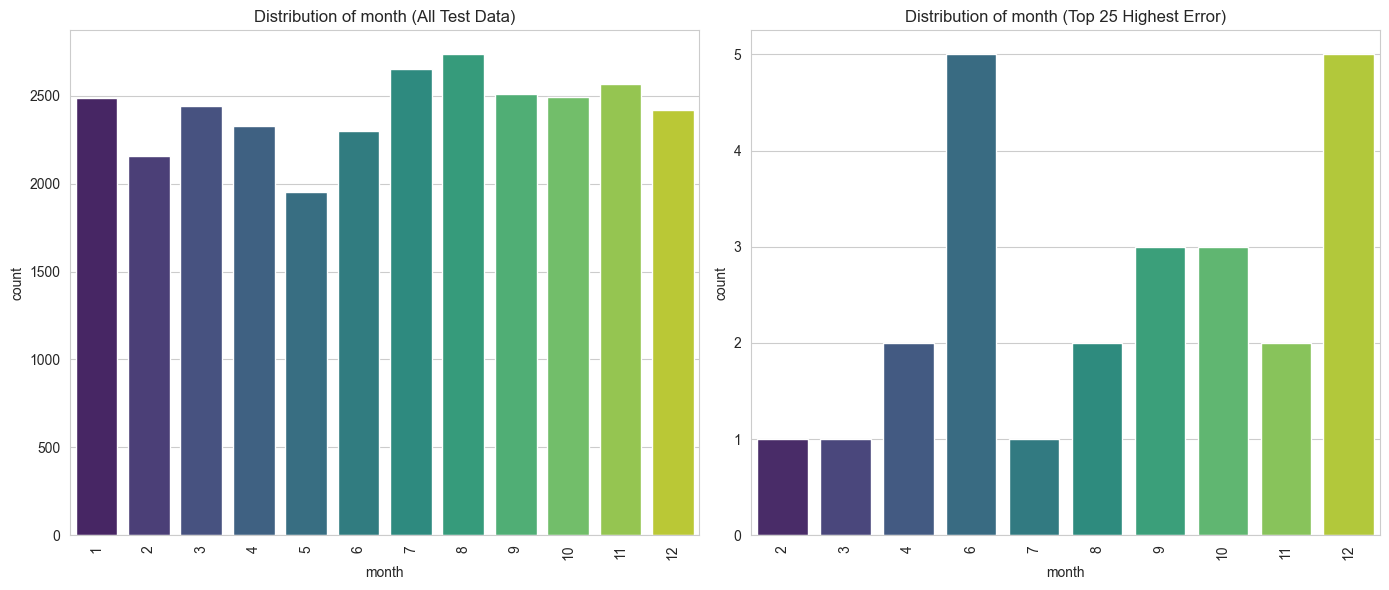

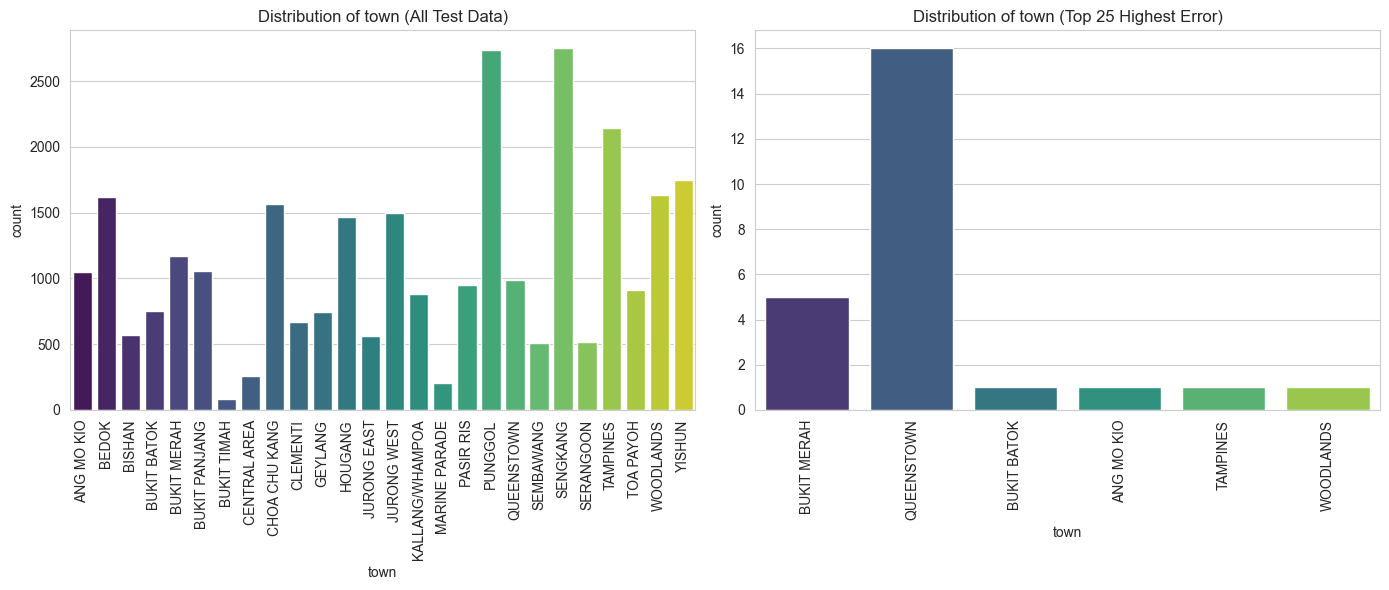

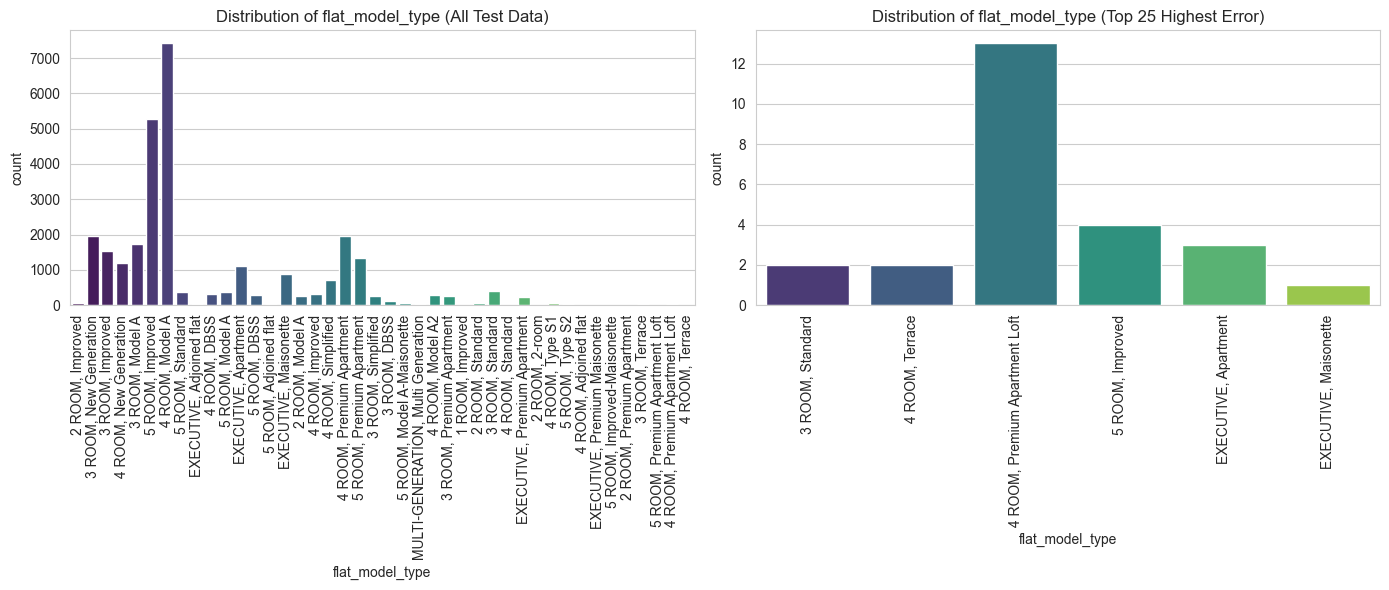

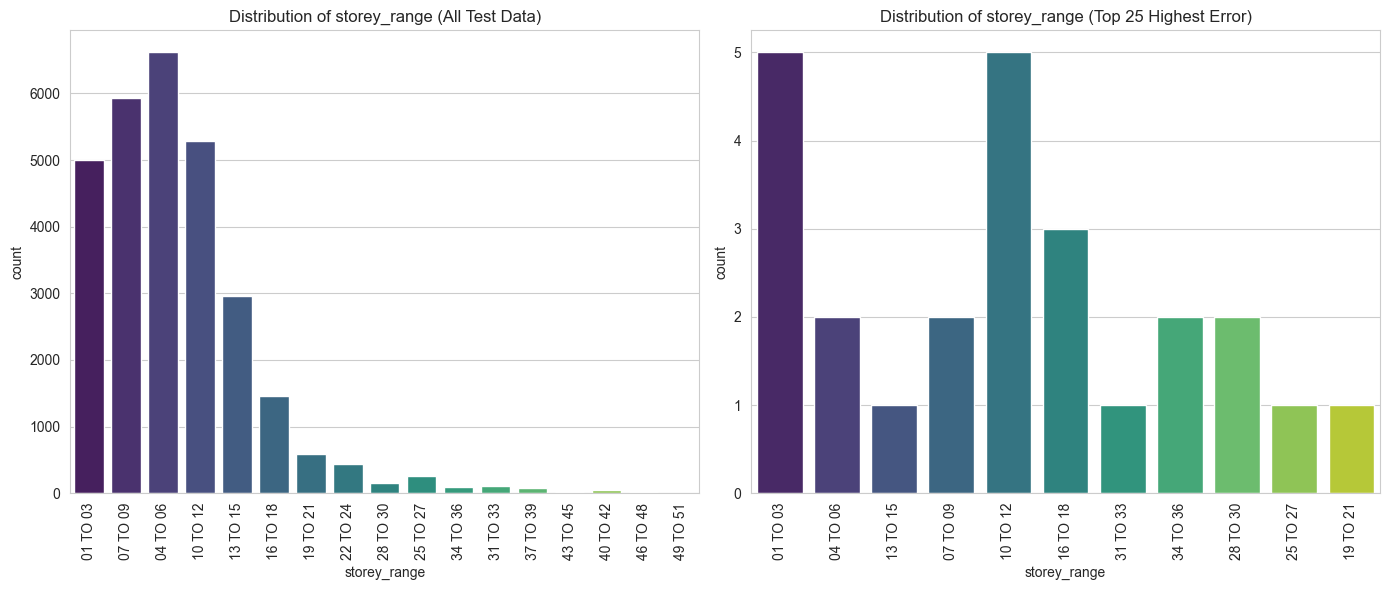

Trend analysis for month:
All Test Data:
8     2735
7     2655
11    2566
9     2510
10    2495
1     2490
3     2442
12    2420
4     2330
6     2300
2     2160
5     1954
Name: month, dtype: int64

Top 25 Highest Error:
12    5
6     5
10    3
9     3
11    2
8     2
4     2
2     1
3     1
7     1
Name: month, dtype: int64


Trend analysis for town:
All Test Data:
SENGKANG           2749
PUNGGOL            2735
TAMPINES           2148
YISHUN             1748
WOODLANDS          1635
BEDOK              1616
CHOA CHU KANG      1565
JURONG WEST        1498
HOUGANG            1470
BUKIT MERAH        1173
BUKIT PANJANG      1055
ANG MO KIO         1053
QUEENSTOWN          986
PASIR RIS           949
TOA PAYOH           915
KALLANG/WHAMPOA     882
BUKIT BATOK         752
GEYLANG             743
CLEMENTI            671
BISHAN              570
JURONG EAST         565
SERANGOON           519
SEMBAWANG           513
CENTRAL AREA        261
MARINE PARADE       204
BUKIT TIMAH          82
Name: 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


categorical_features = ['month', 'town', 'flat_model_type', 'storey_range']

# Plot the distribution of each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(14, 6))
    
    # Plot distribution for the entire test set
    plt.subplot(1, 2, 1)
    sns.countplot(x=feature, data=test_data, palette='viridis')
    plt.title(f'Distribution of {feature} (All Test Data)')
    plt.xticks(rotation=90)
    
    # Plot distribution for the top 25 rows with highest error
    plt.subplot(1, 2, 2)
    sns.countplot(x=feature, data=top_25, palette='viridis')
    plt.title(f'Distribution of {feature} (Top 25 Highest Error)')
    plt.xticks(rotation=90)
    
    plt.tight_layout()
    plt.show()

# Analyze the trends
for feature in categorical_features:
    print(f"Trend analysis for {feature}:")
    print("All Test Data:")
    print(test_data[feature].value_counts())
    print("\nTop 25 Highest Error:")
    print(top_25[feature].value_counts())
    print("\n")


## Analysis
As we can see from the plot of distribution of all data and only the first 25 rows with highest loss, we can find the moss record with highest loss fall into:
- Month of 6 or 12
- Near Queenstown
- 4 Room Premium Apartment Loft
- 1 to 3 or 10-12 months

If we looks into the distribution on the left. We can see there is an **unbalanced distribution** among cateogies. Therefore, my suggestion is:
1. Adding more data for those categories.
2. Feature engineering to better capture the nuances of those categories.
3. Using a different model architecture that might handle those categories better.